# Codejam Qualification Round 2021
https://codingcompetitions.withgoogle.com/codejam

## TASK 1 REVERSORT

Problem

Note: The main parts of the statements of the problems "Reversort" and "Reversort Engineering" are identical, except for the last paragraph. 

The problems can otherwise be solved independently.

Reversort is an algorithm to sort a list of distinct integers in increasing order. 

The algorithm is based on the "Reverse" operation. 

Each application of this operation reverses the order of some contiguous part of the list.

The pseudocode of the algorithm is the following:

Reversort(L):

  for i := 1 to length(L) - 1
  
    j := position with the minimum value in L between i and length(L), inclusive Reverse(L[i..j])
    
After i−1 iterations, the positions 1,2,…,i−1 of the list contain the i−1 smallest elements of L, in increasing order. 

During the i-th iteration, the process reverses the sublist going from the i-th position to the current position of the i-th minimum element. 

That makes the i-th minimum element end up in the i-th position.

For example, for a list with 4 elements, the algorithm would perform 3 iterations. 

Here is how it would process L=[4,2,1,3]:

i=1, j=3⟶L=[1,2,4,3]

i=2, j=2⟶L=[1,2,4,3]

i=3, j=4⟶L=[1,2,3,4]

The most expensive part of executing the algorithm on our architecture is the Reverse operation. 

Therefore, our measure for the cost of each iteration is simply the length of the sublist passed to Reverse, that is, the value j−i+1. 

The cost of the whole algorithm is the sum of the costs of each iteration.

In the example above, the iterations cost 3, 1, and 2, in that order, for a total of 6.

Given the initial list, compute the cost of executing Reversort on it.

Input

The first line of the input gives the number of test cases, T. T test cases follow. 

Each test case consists of 2 lines. 

The first line contains a single integer N, representing the number of elements in the input list. 

The second line contains N distinct integers L1, L2, ..., LN, representing the elements of the input list L, in order.

Output

For each test case, output one line containing Case #x: y, 

where x is the test case number (starting from 1) and 

y is the total cost of executing Reversort on the list given as input.

Limits

Time limit: 10 seconds.

Memory limit: 1 GB.

Test Set 1 (Visible Verdict)

1≤T≤100.

2≤N≤100.

1≤Li≤N, for all i.

Li≠Lj, for all i≠j.

Sample

Sample Input

3

4

4 2 1 3

2

1 2

7

7 6 5 4 3 2 1

Sample Output

Case #1: 6

Case #2: 1

Case #3: 12

Sample Case #1 is described in the statement above.

In Sample Case #2, there is a single iteration, in which Reverse is applied to a sublist of size 1. 

Therefore, the total cost is 1.

In Sample Case #3, the first iteration reverses the full list, for a cost of 7. 

After that, the list is already sorted, but there are 5 more iterations, each of which contributes a cost of 1.

In [6]:
T=int(input())
for t in range(T):
    COST=0
    I=int(input())
    N=input()
    N=[int(n) for n in N.split()]
    print(t,I,N)
    for i in range(I-1):
        j=i+N[i:].index(min(N[i:]))
        print(i,j)
        if i==j:
            COST+=1 
        else:
            L=[N[k] for k in range(i)]
            L+=[N[j-k] for k in range(j-i+1)]
            L+=[N[k] for k in range(j+1,I)]
            COST+=j-i+1
            N=L
        print(N,COST)
    print('Case #{}: {}'.format(t+1,COST))

3
4
4 2 1 3
0 4 [4, 2, 1, 3]
0 2
[1, 2, 4, 3] 3
1 1
[1, 2, 4, 3] 4
2 3
[1, 2, 3, 4] 6
Case #1: 6
2
1 2
1 2 [1, 2]
0 0
[1, 2] 1
Case #2: 1
7
7 6 5 4 3 2 1
2 7 [7, 6, 5, 4, 3, 2, 1]
0 6
[1, 2, 3, 4, 5, 6, 7] 7
1 1
[1, 2, 3, 4, 5, 6, 7] 8
2 2
[1, 2, 3, 4, 5, 6, 7] 9
3 3
[1, 2, 3, 4, 5, 6, 7] 10
4 4
[1, 2, 3, 4, 5, 6, 7] 11
5 5
[1, 2, 3, 4, 5, 6, 7] 12
Case #3: 12


In [7]:
T=int(input())
for t in range(T):
    COST=0
    I=int(input())
    N=input()
    N=[int(n) for n in N.split()]
    for i in range(I-1):
        j=i+N[i:].index(min(N[i:]))
        if i==j:
            COST+=1 
        else:
            L=[N[k] for k in range(i)]
            L+=[N[j-k] for k in range(j-i+1)]
            L+=[N[k] for k in range(j+1,I)]
            COST+=j-i+1
            N=L
    print('Case #{}: {}'.format(t+1,COST))

3
4
4 2 1 3
Case #1: 6
2
1 2
Case #2: 1
7
7 6 5 4 3 2 1
Case #3: 12


## TASK 2 MOONS AND UMBRELLAS

Problem

Cody-Jamal is working on his latest piece of abstract art: a mural consisting of a row of waning moons and closed umbrellas. 

Unfortunately, greedy copyright trolls are claiming that 

waning moons look like an uppercase C and closed umbrellas look like a J, and they have a copyright on CJ and JC.

Therefore, for each time CJ appears in the mural, Cody-Jamal must pay X, and for each time JC appears in the mural, he must pay Y.

Cody-Jamal is unwilling to let them compromise his art, so he will not change anything already painted. 

He decided, however, that the empty spaces he still has could be filled strategically, to minimize the copyright expenses.

For example, if CJ?CC? represents the current state of the mural, 

with C representing a waning moon, J representing a closed umbrella, 

and ? representing a space that still needs to be painted with either a waning moon or a closed umbrella, 

he could finish the mural as CJCCCC, CJCCCJ, CJJCCC, or CJJCCJ. 

The first and third options would require paying X+Y in copyrights, 

while the second and fourth would require paying 2⋅X+Y.

Given the costs X and Y and a string representing the current state of the mural, 

how much does Cody-Jamal need to pay in copyrights if he finishes his mural in a way that minimizes that cost?

Input

The first line of the input gives the number of test cases, T. T lines follow. 

Each line contains two integers X and Y and a string S representing the two costs and the current state of the mural, respectively.

Output

For each test case, output one line containing Case #x: y, 

where x is the test case number (starting from 1) and y is the minimum cost that Cody-Jamal needs to pay in copyrights for a finished mural.

Limits

Time limit: 10 seconds.

Memory limit: 1 GB.

1≤T≤100.

Each character of S is either C, J, or ?.

Test Set 1 (Visible Verdict)

1≤ the length of S ≤10.

1≤X≤100.

1≤Y≤100.

Test Set 2 (Visible Verdict)

1≤ the length of S ≤1000.

1≤X≤100.

1≤Y≤100.

Extra credit!

What if some copyright holders could pay Cody-Jamal for the advertisement instead of being paid? 

Cody-Jamal getting paid is represented by a negative cost.

Test Set 3 (Hidden Verdict)

1≤ the length of S ≤1000.

−100≤X≤100.

−100≤Y≤100.

Sample

Note: there are additional samples that are not run on submissions down below.

Sample Input

4

2 3 CJ?CC?

4 2 CJCJ

1 3 C?J

2 5 ??J???

Sample Output

Case #1: 5

Case #2: 10

Case #3: 1

Case #4: 0

Sample Case #1 is the one explained in the problem statement. The minimum cost is X+Y=2+3=5.

In Sample Case #2, Cody-Jamal is already finished, so he does not have a choice. 

There are two CJs and one JC in his mural.

In Sample Case #3, substituting either C or J results in one CJ either from the second and third characters 

or the first and second characters, respectively.

In Sample Case #4, Cody-Jamal can finish his mural with all Js. 

Since that contains no instance of CJ nor JC, it yields no copyright cost.


Additional Sample - Test Set 3

The following additional sample fits the limits of Test Set 3. 

It will not be run against your submitted solutions.

Sample Input

1

2 -5 ??JJ??

Sample Output

Case #1: -8

In Sample Case #1 for Test Set 3, Cody-Jamal can finish his mural optimally as JCJJCC or JCJJJC. 

Either way, there is one CJ and two JCs in his mural.

In [8]:
def cost(X,Y,S):
    KCJ,KJC=0,0
    for i in range(len(S)-1):
        if S[i]!=S[i+1]:
            if S[i]=='C': KCJ+=1
            else: KJC+=1
    print('number of CJ: %d'%KCJ+\
          '; number of JC: %d'%KJC+\
          '; cost: %d'%(X*KCJ+Y*KJC))
    return X*KCJ+Y*KJC
def min_cost(X,Y,S):
    SS1,SS2='',''
    S1='CJ'*(len(S)//2)+'C'*(len(S)%2)
    S2='JC'*(len(S)//2)+'J'*(len(S)%2)
    for i in range(len(S)):
        if S[i]=='?': SS1+=S1[i]; SS2+=S2[i]
        else: SS1+=S[i]; SS2+=S[i]
    print(S,SS1,SS2)
    return min(cost(X,Y,SS1),cost(X,Y,SS2))
cost(1,5,'JJCCJCCCJCCCJJJCJ')
print('\n'+10*'<=>'+'\n')
min_cost(2,-5,'??JJ??')

number of CJ: 4; number of JC: 4; cost: 24

<=><=><=><=><=><=><=><=><=><=>

??JJ?? CJJJCJ JCJJJC
number of CJ: 2; number of JC: 1; cost: -1
number of CJ: 1; number of JC: 2; cost: -8


-8

In [9]:
T=int(input())
def cost(X,Y,S):
    KCJ,KJC=0,0
    for i in range(len(S)-1):
        if S[i]!=S[i+1]:
            if S[i]=='C': KCJ+=1
            else: KJC+=1
    return X*KCJ+Y*KJC
def min_cost(X,Y,S):
    SS1,SS2='',''
    S1='CJ'*(len(S)//2)+'C'*(len(S)%2)
    S2='JC'*(len(S)//2)+'J'*(len(S)%2)
    for i in range(len(S)):
        if S[i]=='?': SS1+=S1[i]; SS2+=S2[i]
        else: SS1+=S[i]; SS2+=S[i]
    return min(cost(X,Y,SS1),cost(X,Y,SS2))
for t in range(T):
    XYS=input().split()
    X=int(XYS[0])
    Y=int(XYS[1])
    S=XYS[2]
    COST=0
    cond1=(X<0 and Y>=0 and abs(X)<Y) or (X>=0 and Y<0 and abs(Y)<X) \
          or (X>=0 and Y>=0)
    cond2=(X<0 and Y>=0 and abs(X)>Y) or (X>=0 and Y<0 and abs(Y)>X) \
          or (X<0 and Y<0)
    if len(S)>1:
        if cond1:
            S=S.replace('?','')
            if not(('C' not in S) or ('J' not in S) or (len(S)==0)):
                COST=cost(X,Y,S)
        elif cond2:
            COST=min_cost(X,Y,S)
    print('Case #{}: {}'.format(t+1,COST))

5
2 3 CJ?CC?
Case #1: 5
4 2 CJCJ
Case #2: 10
1 3 C?J
Case #3: 1
2 5 ??J???
Case #4: 0
2 -5 ??JJ??
Case #5: -8


## TASK 3 REVERSORT ENGINEERING

Problem

Note: The main parts of the statements of the problems "Reversort" and "Reversort Engineering" are identical, except for the last paragraph. 

The problems can otherwise be solved independently.

Reversort is an algorithm to sort a list of distinct integers in increasing order. 

The algorithm is based on the "Reverse" operation. 

Each application of this operation reverses the order of some contiguous part of the list.

The pseudocode of the algorithm is the following:

Reversort(L):

  for i := 1 to length(L) - 1
  
    j := position with the minimum value in L between i and length(L), inclusive Reverse(L[i..j])
    
After i−1 iterations, the positions 1,2,…,i−1 of the list contain the i−1 smallest elements of L, in increasing order. 

During the i-th iteration, the process reverses the sublist going from the i-th position to the current position of the i-th minimum element. 

That makes the i-th minimum element end up in the i-th position.

For example, for a list with 4 elements, the algorithm would perform 3 iterations. 

Here is how it would process L=[4,2,1,3]:

i=1, j=3⟶L=[1,2,4,3]

i=2, j=2⟶L=[1,2,4,3]

i=3, j=4⟶L=[1,2,3,4]

The most expensive part of executing the algorithm on our architecture is the Reverse operation. 

Therefore, our measure for the cost of each iteration is simply the length of the sublist passed to Reverse, that is, the value j−i+1. 

The cost of the whole algorithm is the sum of the costs of each iteration.

In the example above, the iterations cost 3, 1, and 2, in that order, for a total of 6.

You are given a size N and a cost C. 

Find a list of N distinct integers between 1 and N such that the cost of applying Reversort to it is exactly C, or say that there is no such list.

Input

The first line of the input gives the number of test cases, T. T lines follow. 

Each line describes a test case with two integers N and C, the size of the wanted list and the desired cost, respectively.

Output

For each test case, if there is no list of size N such that applying Reversort to it costs exactly C, 

output one line containing Case #x: IMPOSSIBLE, where x is the test case number (starting from 1). 

Otherwise, output one line containing Case #x: y1 y2 ... yN, where x is the test case number (starting from 1) 

and each yi is a distinct integer between 1 and N, representing the i-th element of one such possible list.

If there are multiple solutions, you may output any one of them. 

(See "What if a test case has multiple correct solutions?" in the Competing section of the FAQ.) 

This information about multiple solutions will not be explicitly stated in the remainder of the 2021 contest.

Limits

Time limit: 10 seconds.

Memory limit: 1 GB.

1≤T≤100.

1≤C≤1000.

Test Set 1 (Visible Verdict)

2≤N≤7.

Test Set 2 (Visible Verdict)

2≤N≤100.

Sample

Sample Input

5

4 6

2 1

7 12

7 2

2 1000

Sample Output

Case #1: 4 2 1 3

Case #2: 1 2

Case #3: 7 6 5 4 3 2 1

Case #4: IMPOSSIBLE

Case #5: IMPOSSIBLE

Sample Case #1 is described in the statement above.

In Sample Case #2, the algorithm runs for only one iteration on the proposed output. 

In that iteration, reverse is applied to a sublist of size 1, therefore, its cost is 1.

In Sample Case #3, the first iteration reverses the full list, for a cost of 7. 

After that, the list is already sorted, but there are 5 more iterations, each of which contributes a cost of 1.

Another valid output would be 7 5 4 3 2 1 6. 

For that output, the first iteration has a cost of 6, the last one has a cost of 2, and all others have a cost of 1.

In Sample Case #4, Reversort will necessarily perform 6 iterations, each of which will have a cost of at least 1, 

so there is no way the total cost can be as low as required.

In [70]:
import itertools,numpy,sympy
from sympy.utilities.iterables import multiset_permutations
sympy.init_printing(use_unicode=True)

In [71]:
C=0; S=['☜','☞','☝︎','☟']
S=multiset_permutations(S)
for s in S: print(s); C+=1
C==sympy.factorial(4)

['☜', '☝︎', '☞', '☟']
['☜', '☝︎', '☟', '☞']
['☜', '☞', '☝︎', '☟']
['☜', '☞', '☟', '☝︎']
['☜', '☟', '☝︎', '☞']
['☜', '☟', '☞', '☝︎']
['☝︎', '☜', '☞', '☟']
['☝︎', '☜', '☟', '☞']
['☝︎', '☞', '☜', '☟']
['☝︎', '☞', '☟', '☜']
['☝︎', '☟', '☜', '☞']
['☝︎', '☟', '☞', '☜']
['☞', '☜', '☝︎', '☟']
['☞', '☜', '☟', '☝︎']
['☞', '☝︎', '☜', '☟']
['☞', '☝︎', '☟', '☜']
['☞', '☟', '☜', '☝︎']
['☞', '☟', '☝︎', '☜']
['☟', '☜', '☝︎', '☞']
['☟', '☜', '☞', '☝︎']
['☟', '☝︎', '☜', '☞']
['☟', '☝︎', '☞', '☜']
['☟', '☞', '☜', '☝︎']
['☟', '☞', '☝︎', '☜']


True

In [72]:
def permutate(input_list):
    if len(input_list)<=1:
        yield input_list
    else:
        for p in permutate(input_list[1:]):
            for i in range(len(input_list)):
                yield p[:i]+input_list[0:1]+p[i:]

In [73]:
C=0; S=['☜','☞','☝︎','☟']
S=list(permutate(S))
for s in S: print(s); C+=1
C==sympy.factorial(4)

['☜', '☞', '☝︎', '☟']
['☞', '☜', '☝︎', '☟']
['☞', '☝︎', '☜', '☟']
['☞', '☝︎', '☟', '☜']
['☜', '☝︎', '☞', '☟']
['☝︎', '☜', '☞', '☟']
['☝︎', '☞', '☜', '☟']
['☝︎', '☞', '☟', '☜']
['☜', '☝︎', '☟', '☞']
['☝︎', '☜', '☟', '☞']
['☝︎', '☟', '☜', '☞']
['☝︎', '☟', '☞', '☜']
['☜', '☞', '☟', '☝︎']
['☞', '☜', '☟', '☝︎']
['☞', '☟', '☜', '☝︎']
['☞', '☟', '☝︎', '☜']
['☜', '☟', '☞', '☝︎']
['☟', '☜', '☞', '☝︎']
['☟', '☞', '☜', '☝︎']
['☟', '☞', '☝︎', '☜']
['☜', '☟', '☝︎', '☞']
['☟', '☜', '☝︎', '☞']
['☟', '☝︎', '☜', '☞']
['☟', '☝︎', '☞', '☜']


True

In [74]:
def cost(N):
    COST=0
    for i in range(len(N)-1):
        j=i+N[i:].index(min(N[i:]))
        if i==j:
            COST+=1 
        else:
            L=[N[k] for k in range(i)]
            L+=[N[j-k] for k in range(j-i+1)]
            L+=[N[k] for k in range(j+1,len(N))]
            COST+=j-i+1
            N=L
    return COST
def max_cost(L):
    if L==2: return 2
    else: return L+max_cost(L-1)
def max_res(L):    
    res=[2,1]
    for i in range(3,L+1):
        p=len(res)//2
        res=res[:p]+[i]+res[p:]
    return res    

In [75]:
for i in range(2,15):
    print(max_res(i),cost(max_res(i)),max_cost(i))

[2, 1] 2 2
[2, 3, 1] 5 5
[2, 4, 3, 1] 9 9
[2, 4, 5, 3, 1] 14 14
[2, 4, 6, 5, 3, 1] 20 20
[2, 4, 6, 7, 5, 3, 1] 27 27
[2, 4, 6, 8, 7, 5, 3, 1] 35 35
[2, 4, 6, 8, 9, 7, 5, 3, 1] 44 44
[2, 4, 6, 8, 10, 9, 7, 5, 3, 1] 54 54
[2, 4, 6, 8, 10, 11, 9, 7, 5, 3, 1] 65 65
[2, 4, 6, 8, 10, 12, 11, 9, 7, 5, 3, 1] 77 77
[2, 4, 6, 8, 10, 12, 13, 11, 9, 7, 5, 3, 1] 90 90
[2, 4, 6, 8, 10, 12, 14, 13, 11, 9, 7, 5, 3, 1] 104 104


cost==3 
 [[1 2 3 4]] 
 (1, 4)


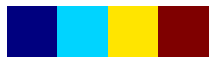

cost==4 
 [[2 1 3 4]
 [1 3 2 4]
 [1 2 4 3]] 
 (3, 4)


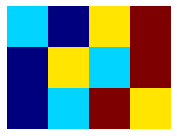

cost==5 
 [[3 1 2 4]
 [3 2 1 4]
 [2 1 4 3]
 [1 4 2 3]
 [1 4 3 2]] 
 (5, 4)


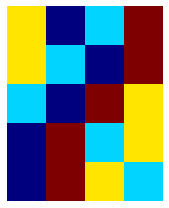

cost==6 
 [[2 3 1 4]
 [1 3 4 2]
 [4 1 2 3]
 [4 2 1 3]
 [4 1 3 2]
 [4 3 2 1]] 
 (6, 4)


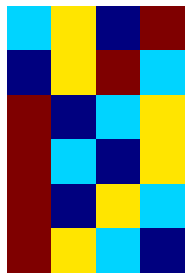

cost==7 
 [[3 1 4 2]
 [3 4 1 2]
 [3 4 2 1]
 [2 4 1 3]
 [4 2 3 1]] 
 (5, 4)


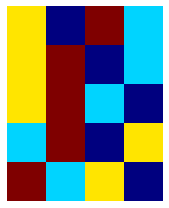

cost==8 
 [[2 3 4 1]
 [3 2 4 1]
 [4 3 1 2]] 
 (3, 4)


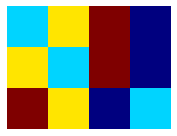

cost==9 
 [[2 4 3 1]] 
 (1, 4)


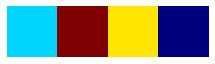

In [76]:
import numpy as np,pylab as pl
def n_matrix_plot(L):
    M=max_cost(L)
    N=list(range(1,L+1))
    SN=list(permutate(N))
    for m in range(L-1,M+1):
        SM=[]
        for el in SN:
            if cost(el)==m: 
                SM.append(el)
        SM=np.array(SM)
        print('cost==%d \n'%m,SM,'\n',SM.shape)
        pl.figure(figsize=(L,SM.shape[0]//2+1))
        pl.imshow(SM,cmap='jet'); pl.axis('off')
        pl.tight_layout(); pl.show()
n_matrix_plot(4)

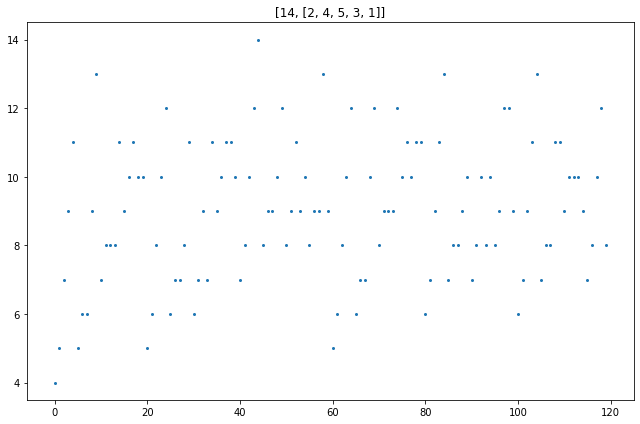

In [77]:
def cost_plot(L):
    N=list(range(1,L+1))
    SN=list(permutate(N))
    M=[cost(s) for s in SN]
    pl.figure(figsize=(9,6))
    pl.plot(M,'o',ms=2)
    pl.title(str([max_cost(L),max_res(L)]))
    pl.tight_layout(); pl.show()
cost_plot(5)

In [78]:
def find_list(L,COST):
    input_list=list(range(1,L+1))
    gen=permutate(input_list)
    curr_list=next(gen)
    curr_cost=cost(curr_list)
    while cost(curr_list)!=COST:
        curr_list=next(gen)
    return curr_list
for c in range(4,14):
    print(c,find_list(5,c),cost(find_list(5,c))) 

4 [1, 2, 3, 4, 5] 4
5 [2, 1, 3, 4, 5] 5
6 [3, 1, 2, 4, 5] 6
7 [2, 3, 1, 4, 5] 7
8 [3, 1, 4, 2, 5] 8
9 [2, 3, 4, 1, 5] 9
10 [3, 1, 4, 5, 2] 10
11 [2, 3, 4, 5, 1] 11
12 [2, 4, 3, 5, 1] 12
13 [3, 2, 4, 5, 1] 13


In [79]:
def permutate(input_list):
    if len(input_list)<=1:
        yield input_list
    else:
        for p in permutate(input_list[1:]):
            for i in range(len(input_list)):
                yield p[:i]+input_list[0:1]+p[i:]
def cost(N):
    COST=0
    for i in range(len(N)-1):
        j=i+N[i:].index(min(N[i:]))
        if i==j:
            COST+=1 
        else:
            L=[N[k] for k in range(i)]
            L+=[N[j-k] for k in range(j-i+1)]
            L+=[N[k] for k in range(j+1,len(N))]
            COST+=j-i+1
            N=L
    return COST
def max_cost(L):
    if L==2: return 2
    else: return L+max_cost(L-1)
def max_res(L):    
    res=[2,1]
    for i in range(3,L+1):
        p=len(res)//2
        res=res[:p]+[i]+res[p:]
    return res
def find_list(L,COST):
    input_list=list(range(1,L+1))
    gen=permutate(input_list)
    curr_list=next(gen)
    curr_cost=cost(curr_list)
    while cost(curr_list)!=COST:
        curr_list=next(gen)
    return curr_list
T=int(input())
for t in range(T):
    S=input().split()
    L=int(S[0])
    COST=int(S[1])
    BASE=list(range(1,L+1))
    if COST<L-1 or COST>max_cost(L):
        RES='IMPOSSIBLE'
    elif COST==max_cost(L):
        RES=max_res(L)
    elif COST in range(L-1,2*L-1):
        RES=BASE[:COST-L+2][::-1]+BASE[COST-L+2:]
    else:
        RES=find_list(L,COST)
    if RES!='IMPOSSIBLE':
        RES=' '.join(str(el) for el in RES)
    print('Case #{}: {}'.format(t+1,RES))

5
4 6
Case #1: 4 3 2 1
2 1
Case #2: 1 2
7 12
Case #3: 7 6 5 4 3 2 1
7 2
Case #4: IMPOSSIBLE
2 1000
Case #5: IMPOSSIBLE


## TASK 4 MEDIAN SORT

Problem

You want to sort N distinct items, x1,x2,…,xN. Unfortunately, you do not have a way of comparing two of these items. 

You only have a way to, given three of them, find out which one is the median, that is, which one is neither the minimum nor the maximum among the three.

For example, suppose N=5 and you know that:

x1 is the median of {x1,x2,x3}

x2 is the median of {x2,x3,x4}

x3 is the median of {x3,x4,x5}

Then, it is guaranteed that the sorted order of the elements is either x4,x2,x1,x3,x5 or its reverse x5,x3,x1,x2,x4.

Notice that by knowing only medians, it is impossible to distinguish the order of any list from its reverse, 

since the median question has the same result for any three elements in both cases.

Your program will have to find the order of T lists of N elements using at most Q median questions in total (or Q/T queries per list on average). 

In each case, finding either the right order or its reverse is considered correct. The order for each case is generated uniformly at random from all possible orders, and independently of any other information.

Input and output

This is an interactive problem. 

You should make sure you have read the information in the Interactive Problems section of our FAQ.

Initially, the judge will send you a single line containing three integers T, N, and Q: 

the number of test cases, the number of elements to sort within each test case, and the total number of questions you are allowed across all test cases, respectively.

Then, you must process T test cases. 

Each test case consists of a series of question exchanges plus an additional exchange to provide the answer.

For a question exchange, your program must print a single line containing three distinct integers i,j,k all between 1 and N, inclusive, 

which corresponds to asking the judge "which element is the median of the set {xi,xj,xk}?" 

The judge will respond with a single line containing a single integer L, 

meaning that the median of that set is xL (L is always equal to one of i, j, or k). 

If you try to perform a (Q+1)-th question exchange, the judge will simply output -1.

Once you are ready to state the result, print a line containing N integers representing the indices of the elements in sorted or reverse sorted order. 

The judge will respond with a single integer 1 if your answer is correct or -1 if it is not. 

After receiving the judge's answer for the T-th case, your program must finish in time in order to not receive a Time Limit Exceeded error. 

In addition, if you print additional information after receiving the result for the T-th case, you will get a Wrong Answer judgment.

If the judge receives an invalidly formatted line or invalid values from your program at any moment, the judge will print a single number -1. 

After the judge prints -1 for any of the reasons explained above, it will not print any further output. 

If your program continues to wait for the judge after receiving a -1, your program will time out, resulting in a Time Limit Exceeded error. 

Notice that it is your responsibility to have your program exit in time to receive a Wrong Answer judgment instead of a Time Limit Exceeded error. 

As usual, if the memory limit is exceeded, or your program gets a runtime error, you will receive the appropriate judgment.

Limits

Time limit: 40 seconds.

Memory limit: 1 GB.

T=100.

Test Set 1 (Visible Verdict)

N=10.

Q=300⋅T.

Test Set 2 (Visible Verdict)

N=50.

Q=300⋅T.

Test Set 3 (Hidden Verdict)

N=50.

Q=170⋅T.

Testing Tool

You can use this testing tool to test locally or on our platform. 
To test locally, you will need to run the tool in parallel with your code; you can use our interactive runner for that. 
For more information, read the instructions in comments in that file, and also check out the Interactive Problems section of the FAQ.

Instructions for the testing tool are included in comments within the tool. 

We encourage you to add your own test cases. Please be advised that although the testing tool is intended to simulate the judging system, 

it is NOT the real judging system and might behave differently. 

If your code passes the testing tool but fails the real judge, please check the Coding section of the FAQ to make sure that you are using the same compiler as us.